### Group 1
- N10561358 Yanhao Yu
- N10548467 Pattarachai Roongsritong
- N10423010 Xinruo Wang

# Project 2 (a): Clustering hospitals according to their bed capacity

## Project 2a task1

Identify the data quality problems in this dataset such as unusual data types, missing
values, etc, and explain how to fix them?

Answer 
- Initially, it appeared that the data set contains no missing value but when it is shown in a table format, it is found that there are some empty strings which is the reason why it did not show any missing value. Therefore, four columns (NUM_LICENSED_BEDS, NUM_STAFFED_BEDS, BED_UTILIZATION and AVG_VENTILATOR_USAGE) which have incorrect type are replaced the empty strings with NaN and converted to floating point values.
- Since the column named 'Potential_Increase_In_Bed_Capac' is derived from taking away the number of licensed beds from the number of staffed beds, the column should not contain negative values which is against the distribution plot. As a result, the negative values of Potential_Increase_In_Bed_Capac are filtered out as anomalies. 
- Clustering algorithms are sensitive to missing values since they can be percieved as infinitively far away which can be considered as noises. Although there are some techniques to imputate them, they would cause biases. Additionaly, the missing values are relatively small number thus they are eliminated by dropna() function.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('usa_hospital_beds.csv', na_filter=False, encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   X                                6626 non-null   object
 1   Y                                6626 non-null   object
 2   ID                               6626 non-null   int64 
 3   HOSPITAL_NAME                    6626 non-null   object
 4   HOSPITAL_TYPE                    6626 non-null   object
 5   ADDRESS                          6626 non-null   object
 6   CITY                             6626 non-null   object
 7   STATE                            6626 non-null   object
 8   ZIP_CODE                         6626 non-null   int64 
 9   COUNTY_NAME                      6626 non-null   object
 10  STATE_NAME                       6626 non-null   object
 11  NUM_LICENSED_BEDS                6626 non-null   object
 12  NUM_STAFFED_BEDS                 6

In [3]:
df.head()

,X,Y,ID,HOSPITAL_NAME,HOSPITAL_TYPE,ADDRESS,CITY,STATE,ZIP_CODE,COUNTY_NAME,STATE_NAME,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.0661569,33.4954978,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,Phoenix,AZ,85012,Maricopa,Arizona,62,62,0,0,,0,0
1,-110.9658852,32.1812634,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,Tucson,AZ,85723,Pima,Arizona,,,2,2,,0,2
2,-119.7797421,36.7733235,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,Fresno,CA,93703,Fresno,California,,,2,2,,0,2
3,-72.9576103,41.2844004,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,West Haven,CT,6516,New Haven,Connecticut,216,216,1,1,,0,2
4,-75.6065325,39.7402063,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,Wilmington,DE,19805,New Castle,Delaware,,,0,0,,0,1


In [4]:
df['NUM_LICENSED_BEDS'] = df['NUM_LICENSED_BEDS'].replace('', np.nan).astype(float)
df['NUM_STAFFED_BEDS'] = df['NUM_STAFFED_BEDS'].replace('', np.nan).astype(float)
df['BED_UTILIZATION'] = df['BED_UTILIZATION'].replace('', np.nan).astype(float)
df['AVG_VENTILATOR_USAGE'] = df['AVG_VENTILATOR_USAGE'].replace('', np.nan).astype(float)

In [5]:
df.columns.tolist()

['X',
 'Y',
 'ID',
 'HOSPITAL_NAME',
 'HOSPITAL_TYPE',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'COUNTY_NAME',
 'STATE_NAME',
 'NUM_LICENSED_BEDS',
 'NUM_STAFFED_BEDS',
 'NUM_ICU_BEDS',
 'ADULT_ICU_BEDS',
 'BED_UTILIZATION',
 'Potential_Increase_In_Bed_Capac',
 'AVG_VENTILATOR_USAGE']

In [6]:
df_task1 = df.drop(['X','Y','ID','HOSPITAL_NAME','HOSPITAL_TYPE','ADDRESS','CITY','STATE','ZIP_CODE','COUNTY_NAME','STATE_NAME'], axis = 1)
df_task1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NUM_LICENSED_BEDS                6403 non-null   float64
 1   NUM_STAFFED_BEDS                 6328 non-null   float64
 2   NUM_ICU_BEDS                     6626 non-null   int64  
 3   ADULT_ICU_BEDS                   6626 non-null   int64  
 4   BED_UTILIZATION                  5917 non-null   float64
 5   Potential_Increase_In_Bed_Capac  6626 non-null   int64  
 6   AVG_VENTILATOR_USAGE             6567 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 362.5 KB


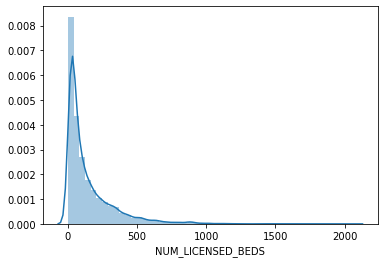

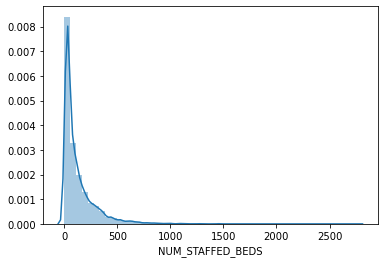

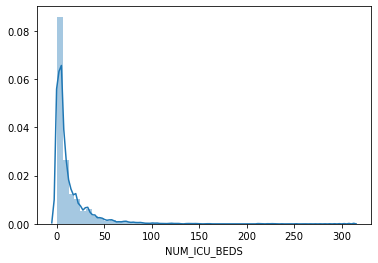

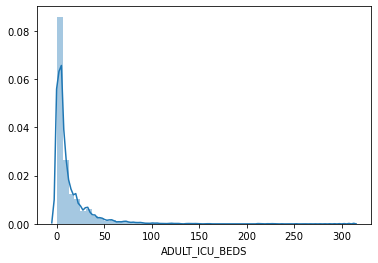

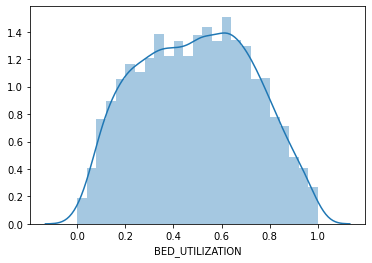

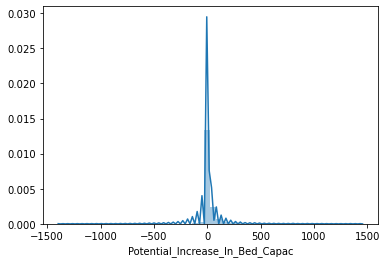

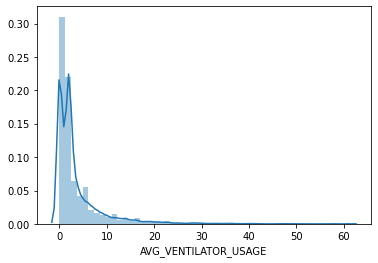

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of NUM_LICENSED_BEDS
regdens_dist = sns.distplot(df_task1['NUM_LICENSED_BEDS'].dropna())
plt.show()
# Distribution of NUM_STAFFED_BEDS
medhhinc_dist = sns.distplot(df_task1['NUM_STAFFED_BEDS'].dropna())
plt.show()
# Distribution of NUM_ICU_BEDS
meanhhsz_dist = sns.distplot(df_task1['NUM_ICU_BEDS'].dropna())
plt.show()
# Distribution of ADULT_ICU_BEDS  
regdens_dist = sns.distplot(df_task1['ADULT_ICU_BEDS'].dropna())
plt.show()
# Distribution of BED_UTILIZATION  
regdens_dist = sns.distplot(df_task1['BED_UTILIZATION'].dropna())
plt.show()
# Distribution of Potential_Increase_In_Bed_Capac
medhhinc_dist = sns.distplot(df_task1['Potential_Increase_In_Bed_Capac'].dropna())
plt.show()
# Distribution of AVG_VENTILATOR_USAGE
meanhhsz_dist = sns.distplot(df_task1['AVG_VENTILATOR_USAGE'].dropna())
plt.show()

In [8]:
#dealing with negative potential increase in bed capacity values
df_task1 = df_task1[df_task1['Potential_Increase_In_Bed_Capac'] >= 0]

In [9]:
df_task1 = df_task1.dropna()

In [10]:
df_task1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5553 entries, 9 to 6544
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NUM_LICENSED_BEDS                5553 non-null   float64
 1   NUM_STAFFED_BEDS                 5553 non-null   float64
 2   NUM_ICU_BEDS                     5553 non-null   int64  
 3   ADULT_ICU_BEDS                   5553 non-null   int64  
 4   BED_UTILIZATION                  5553 non-null   float64
 5   Potential_Increase_In_Bed_Capac  5553 non-null   int64  
 6   AVG_VENTILATOR_USAGE             5553 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 347.1 KB


## Project 2a task2

Build a clustering model to profile the hospitals based on the beds and ventilators'capacity. Answer the followings:
 - a. What clustering algorithm have you used?
 - b. List the attributes used in this analysis.
 - c. What is the optimal number of clusters identified? How did you reach this optimal number?
 - d. Did you normalise the variables? What was its effect on the model – Does the variable normalization process enable a better clustering solution?

Answers
- a. K-mean clustering algorithm is used because it is more suitable for a large data set than the hierachical approach which can produce so many rules that they are difficult to interpret. 
- b.There are 7 attributes used in this analysis which are NUM_LICENSED_BEDS','NUM_STAFFED_BEDS','NUM_ICU_BEDS','ADULT_ICU_BEDS','BED_UTILIZATION','Potential_Increase_In_Bed_Capac', and'AVG_VENTILATOR_USAGE'.
- c. The optimal number of clusters is 6 which is found from making use of Elbow method to obtain candidate potimal values of K and be determined by Silhouette score.
- Yes, the normalised variables were use. In order to use the k-means method, Euclidian distance measure is used to calculate the distances of two points. Since Euclidian distance favours features with larger scale, it is necessary to perform normalisation (scaling) before performing clustering. At the same value of K = 3, it appears that there is a significant difference of the sum of intra-cluster distances between the model fitted with normalised data and unnormalised data. 

In [11]:
from sklearn.preprocessing import StandardScaler
# take 7 variables and drop the rest
df_task2 = df_task1[['NUM_LICENSED_BEDS',
 'NUM_STAFFED_BEDS',
 'NUM_ICU_BEDS',
 'ADULT_ICU_BEDS',
 'BED_UTILIZATION',
 'Potential_Increase_In_Bed_Capac',
 'AVG_VENTILATOR_USAGE']]
# convert df2 to matrix
X = df_task2.to_numpy()
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
from sklearn.cluster import KMeans
# random state, we will use 42 instead of 10 for a change
rs = 42
# set the random state. different random state seeds might result in different centroids lo
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 17419.55426721536
Centroid locations:
[-0.4648525  -0.45382406 -0.39369012 -0.39369012 -0.22137526 -0.2753325
 -0.39447643]
[0.90227349 0.842533   0.60214153 0.60214153 0.5090212  0.62155906
 0.64007048]
[2.83131456 2.92568528 3.0805816  3.0805816  1.01403052 1.30977141
 2.93196846]


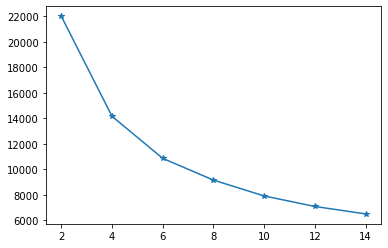

In [13]:
# list to save the clusters and cost
clusters = []
inertia_vals = []
# this whole process should take a while
for k in range(2, 15, 2):
 # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
 # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    # plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))
print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))
print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.36130595555249323
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.3875501565490402
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=8 0.3775777642387212


#### working with unnormalised data

In [15]:
X_unnormalised = df_task2.to_numpy()

In [16]:
from sklearn.cluster import KMeans
# random state, we will use 42 instead of 10 for a change
rs = 42
# set the random state. different random state seeds might result in different centroids lo
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X_unnormalised)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 75153191.02758087
Centroid locations:
[7.30483019e+02 5.83660377e+02 6.61698113e+01 6.61698113e+01
 7.24305164e-01 1.46822642e+02 1.85245283e+01]
[64.21169848 54.61502692  6.13876652  6.13876652  0.44079808  9.59667156
  1.71194322]
[310.34109817 250.31281198  28.19467554  28.19467554   0.60271195
  60.02828619   7.39351082]


## Project 2a task3

For the model with the optimal number of clusters,
- a. Visualize the clusters using ‘pairplot’ and interpret the visualization.
- b. Characterize the nature of each cluster by giving it a descriptive label and a brief description. Hint: use cluster distribution.

Answers:
   - a. Each cluster is profiled as following
        - <span style="color:blue;">cluster 0 (blue):</span> The hospitals with highest potential increase in bed capacity, small number of ICU beds, and small number of adult ICU beds.
        - <span style="color:orange;">cluster 1 (orange):</span> Hospitals with highest rate of bed utilisation.
        - <span style="color:green;">cluster 2 (green):</span> The hospitals with have the size between cluster 3 and 4.
        - <span style="color:red;">cluster 3 (red):</span> Large scale hospitals with a large number of different beds and high average ventilator usage, but the potential increase in bed capacity and bed utilisation rate are not as high as cluster 0 (blue) and cluster 1 (orange), respectively.
        - <span style="color:purple;">cluster 4 (purple):</span> Medium size hospitals with bed utilisation rate ranging from 0.5 to 1.
        - <span style="color:brown;">cluster 5 (brown):</span> Smallest size hospitals among 6 clusters with the smallest number of different beds and bed utilisation as well as the smallest average ventilator usage. 
 
   - b. According to the charts below, the blue lines represent a characteristic of a specific cluster while the black lines reflect the distributions across all records.
        - **cluster 0:** right leaning NUM_LICENSED_ BED ,  right leaning NUM_STAFFED_BED, right leaning NUM_ICU_BEDS and right leaning ADULT_ICU_BEDS, right leaning BED_UTILIZATION, right leaning Potential_Increase_In_Bed_Capac, right leaning AVG_VENTILATOR_USAGE. Hospitals in cluster 0 are hospitals with a large number of beds, high potential increase in capacity and high ventilator usage.
        - **cluster 1:** middle NUM_LICENSED_ BED ,  middle NUM_STAFFED_BED, left leaning NUM_ICU_BEDS and left leaning ADULT_ICU_BEDS, right leaning BED_UTILIZATION, left leaning Potential_Increase_In_Bed_Capac, left leaning AVG_VENTILATOR_USAGE . Hospitals in cluster 1 are hospitals with average number of beds, high bed utilisation rate, average potential increase in capacity and average ventilator usage.
        - **cluster 2:** right leaning NUM_LICENSED_ BED ,  right leaning NUM_STAFFED_BED, right leaning NUM_ICU_BEDS and right leaning ADULT_ICU_BEDS, right leaning BED_UTILIZATION, middle Potential_Increase_In_Bed_Capac, right leaning AVG_VENTILATOR_USAGE . Hospitals in cluster 2 are similar to cluster 0, but bed utilisation rate is higher, potential increase in capacity is close to the average.
        - **cluster 3:** right leaning NUM_LICENSED_ BED ,  right leaning NUM_STAFFED_BED, right leaning NUM_ICU_BEDS and right leaning ADULT_ICU_BEDS, right leaning BED_UTILIZATION, middle Potential_Increase_In_Bed_Capac, right leaning AVG_VENTILATOR_USAGE . Hospitals in cluster 3 are a small group of large hospitals with highest number of beds, high bed utilisation rate, average potential increase in capacity and highest ventilator usage.
        - **cluster 4:** right leaning NUM_LICENSED_ BED ,  right leaning NUM_STAFFED_BED, right leaning NUM_ICU_BEDS and right leaning ADULT_ICU_BEDS, right leaning BED_UTILIZATION, left Potential_Increase_In_Bed_Capac, right leaning AVG_VENTILATOR_USAGE . Hospitals in cluster 4 are middle sized hospitals with above average number of beds, median bed utilisation rate, average potential increase in capacity and above average ventilator usage.
        - **cluster 5:** middle NUM_LICENSED_ BED ,  middle NUM_STAFFED_BED, middle NUM_ICU_BEDS and middle ADULT_ICU_BEDS, left leaning BED_UTILIZATION, left leaning Potential_Increase_In_Bed_Capac, middle AVG_VENTILATOR_USAGE . Hospitals in cluster 5 are average number of different beds but they have the lowest bed utilisation rate and average ventilator usage.

Cluster membership
5    2432
1    1440
4    1094
2     372
0     115
3     100
Name: Cluster_ID, dtype: int64


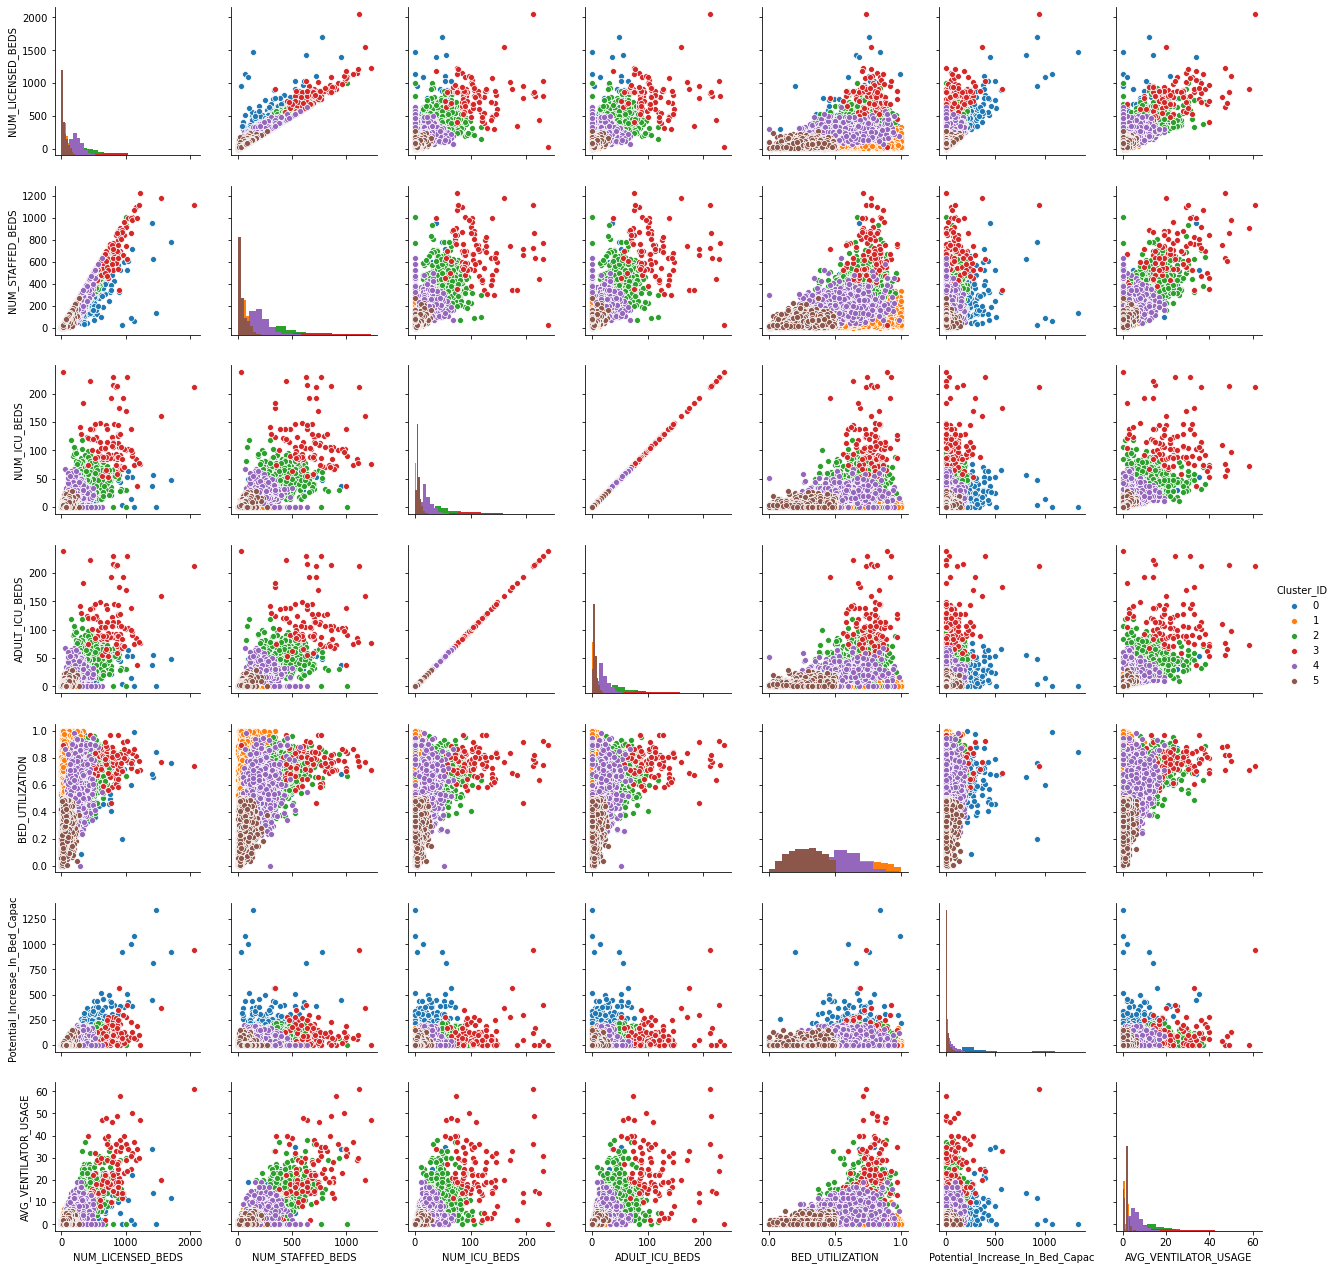

In [17]:
model = KMeans(n_clusters=6, random_state=rs).fit(X)
# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df_task2['Cluster_ID'] = y
# how many records are in each cluster
print("Cluster membership")
print(df_task2['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_task2, hue='Cluster_ID',diag_kind='hist')
plt.show()

Distribution for cluster 0


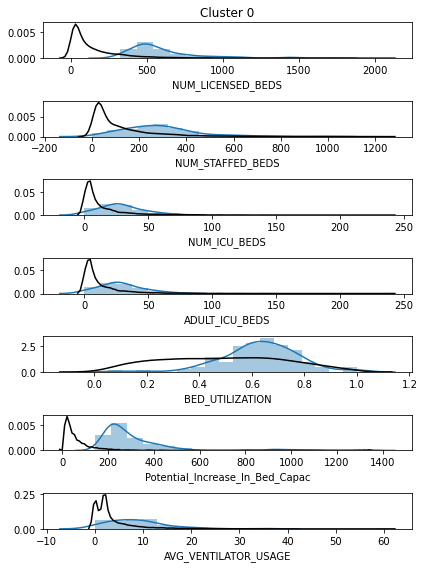

Distribution for cluster 1


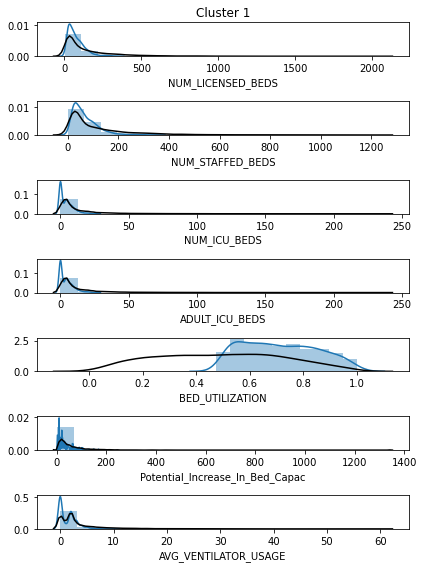

Distribution for cluster 2


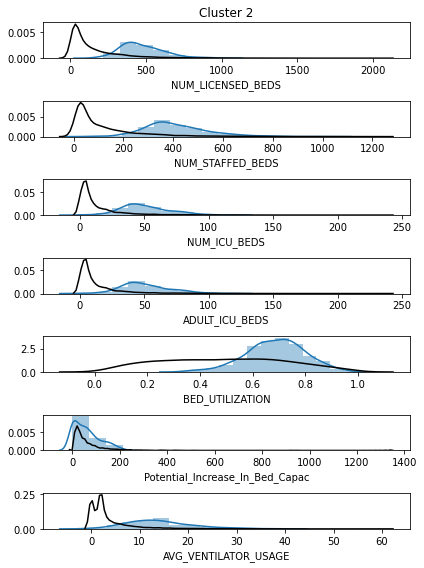

Distribution for cluster 3


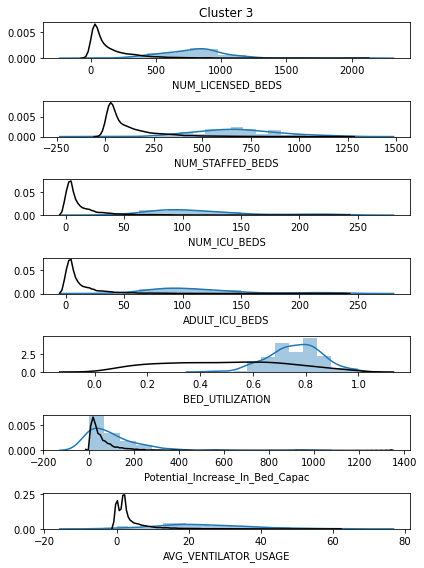

Distribution for cluster 4


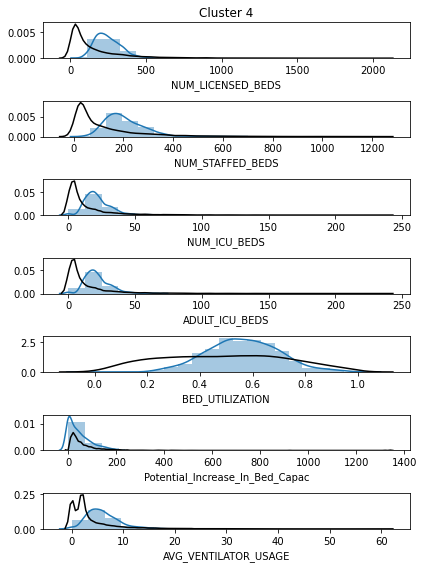

Distribution for cluster 5


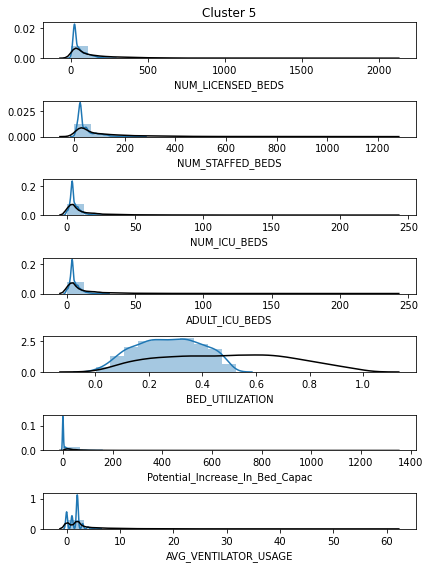

In [18]:
# prepare the column and bin size. Increase bin size to be more specific
cols = ['NUM_LICENSED_BEDS',
 'NUM_STAFFED_BEDS',
 'NUM_ICU_BEDS',
 'ADULT_ICU_BEDS',
 'BED_UTILIZATION',
 'Potential_Increase_In_Bed_Capac',
 'AVG_VENTILATOR_USAGE']
n_bins = 20
# inspecting cluster 0 - 5
clusters_to_inspect = [0,1,2,3,4,5]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=7, figsize=(6,8))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_task2[col]), max(df_task2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df_task2[df_task2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_task2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

## Project 2a task4

Build another clustering model to profile the hospitals based on the service provided as
well as their beds and ventilators’ capacity. Use the best setting (e.g., variable
normalisations, optimal K, etc) obtained in the previous model. Answer the followings:
- a. What clustering algorithm have you used?
- b. List the attributes used in this analysis.
- c. What difference do you see in this clustering interpretation when compared to the previous one?

Answers
- a. K-prototypes clustering method is used because the dataset contains additional categorical value (services provided by hospitals) and this method is used to handle mixed data. 
- b. There are 8 attributes which are 'HOSPITAL_TYPE','NUM_LICENSED_BEDS','NUM_STAFFED_BEDS','NUM_ICU_BEDS','ADULT_ICU_BEDS','BED_UTILIZATION','Potential_Increase_In_Bed_Capac', and'AVG_VENTILATOR_USAGE'('HOSPITAL_TYPE’ is added because this variable denotes the services provided by hospitals).
- c. The major differences are listed below
    - **cluster 0:** Potential increase in bed capacity is lowered.
    - **cluster 1:** The number of beds, potential increase in bed capacity and average ventilator usage have increased.
    - **cluster 2:** The numbers related to beds are lowered.
    - **cluster 3:** There is no significant change. 
    - **cluster 4:** In the previous model, it was above average size hospital in terms of bed numbers; however it is slightly below average with k-prototype.
    - **cluster 5:** Bed utilisation rate has become higher than K-mean algorithm.

In [19]:
df_task4 = df.drop(['X','Y','ID','HOSPITAL_NAME','ADDRESS','CITY','STATE','ZIP_CODE','COUNTY_NAME','STATE_NAME'], axis = 1)
df_task4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HOSPITAL_TYPE                    6626 non-null   object 
 1   NUM_LICENSED_BEDS                6403 non-null   float64
 2   NUM_STAFFED_BEDS                 6328 non-null   float64
 3   NUM_ICU_BEDS                     6626 non-null   int64  
 4   ADULT_ICU_BEDS                   6626 non-null   int64  
 5   BED_UTILIZATION                  5917 non-null   float64
 6   Potential_Increase_In_Bed_Capac  6626 non-null   int64  
 7   AVG_VENTILATOR_USAGE             6567 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 414.2+ KB


In [20]:
#dealing with negative potential increase in bed capacity values
df_task4 = df_task4[df_task4['Potential_Increase_In_Bed_Capac'] >= 0]

In [21]:
df_task4 = df_task4.dropna()
df_task4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5553 entries, 9 to 6544
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HOSPITAL_TYPE                    5553 non-null   object 
 1   NUM_LICENSED_BEDS                5553 non-null   float64
 2   NUM_STAFFED_BEDS                 5553 non-null   float64
 3   NUM_ICU_BEDS                     5553 non-null   int64  
 4   ADULT_ICU_BEDS                   5553 non-null   int64  
 5   BED_UTILIZATION                  5553 non-null   float64
 6   Potential_Increase_In_Bed_Capac  5553 non-null   int64  
 7   AVG_VENTILATOR_USAGE             5553 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 390.4+ KB


In [22]:
print(df_task4['HOSPITAL_TYPE'].unique())

['Short Term Acute Care Hospital' 'Critical Access Hospital'
 'Childrens Hospital' 'Long Term Acute Care Hospital'
 'Rehabilitation Hospital' 'Psychiatric Hospital'
 'Religious Non-Medical Health Care Institution']


In [23]:
from sklearn.preprocessing import StandardScaler

# mapping
hospital_type_map = {'Short Term Acute Care Hospital':1, 'Critical Access Hospital':2, 'Childrens Hospital':3, 'Long Term Acute Care Hospital':4,
 'Rehabilitation Hospital':5, 'Psychiatric Hospital':6,'Religious Non-Medical Health Care Institution':7}
df_task4['HOSPITAL_TYPE'] = df_task4['HOSPITAL_TYPE'].map(hospital_type_map)
# convert df to matrix
X = df_task4.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [25]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [26]:
# train clustering with the best setting from the previous step
model = KPrototypes(n_clusters=6, random_state=rs, n_jobs=10)
model.fit_predict(X, categorical=[1])    

array([4, 2, 2, ..., 5, 2, 5], dtype=uint16)

Cluster membership
4    2526
2    1290
5    1123
3     399
1     129
0      86
Name: Cluster_ID, dtype: int64


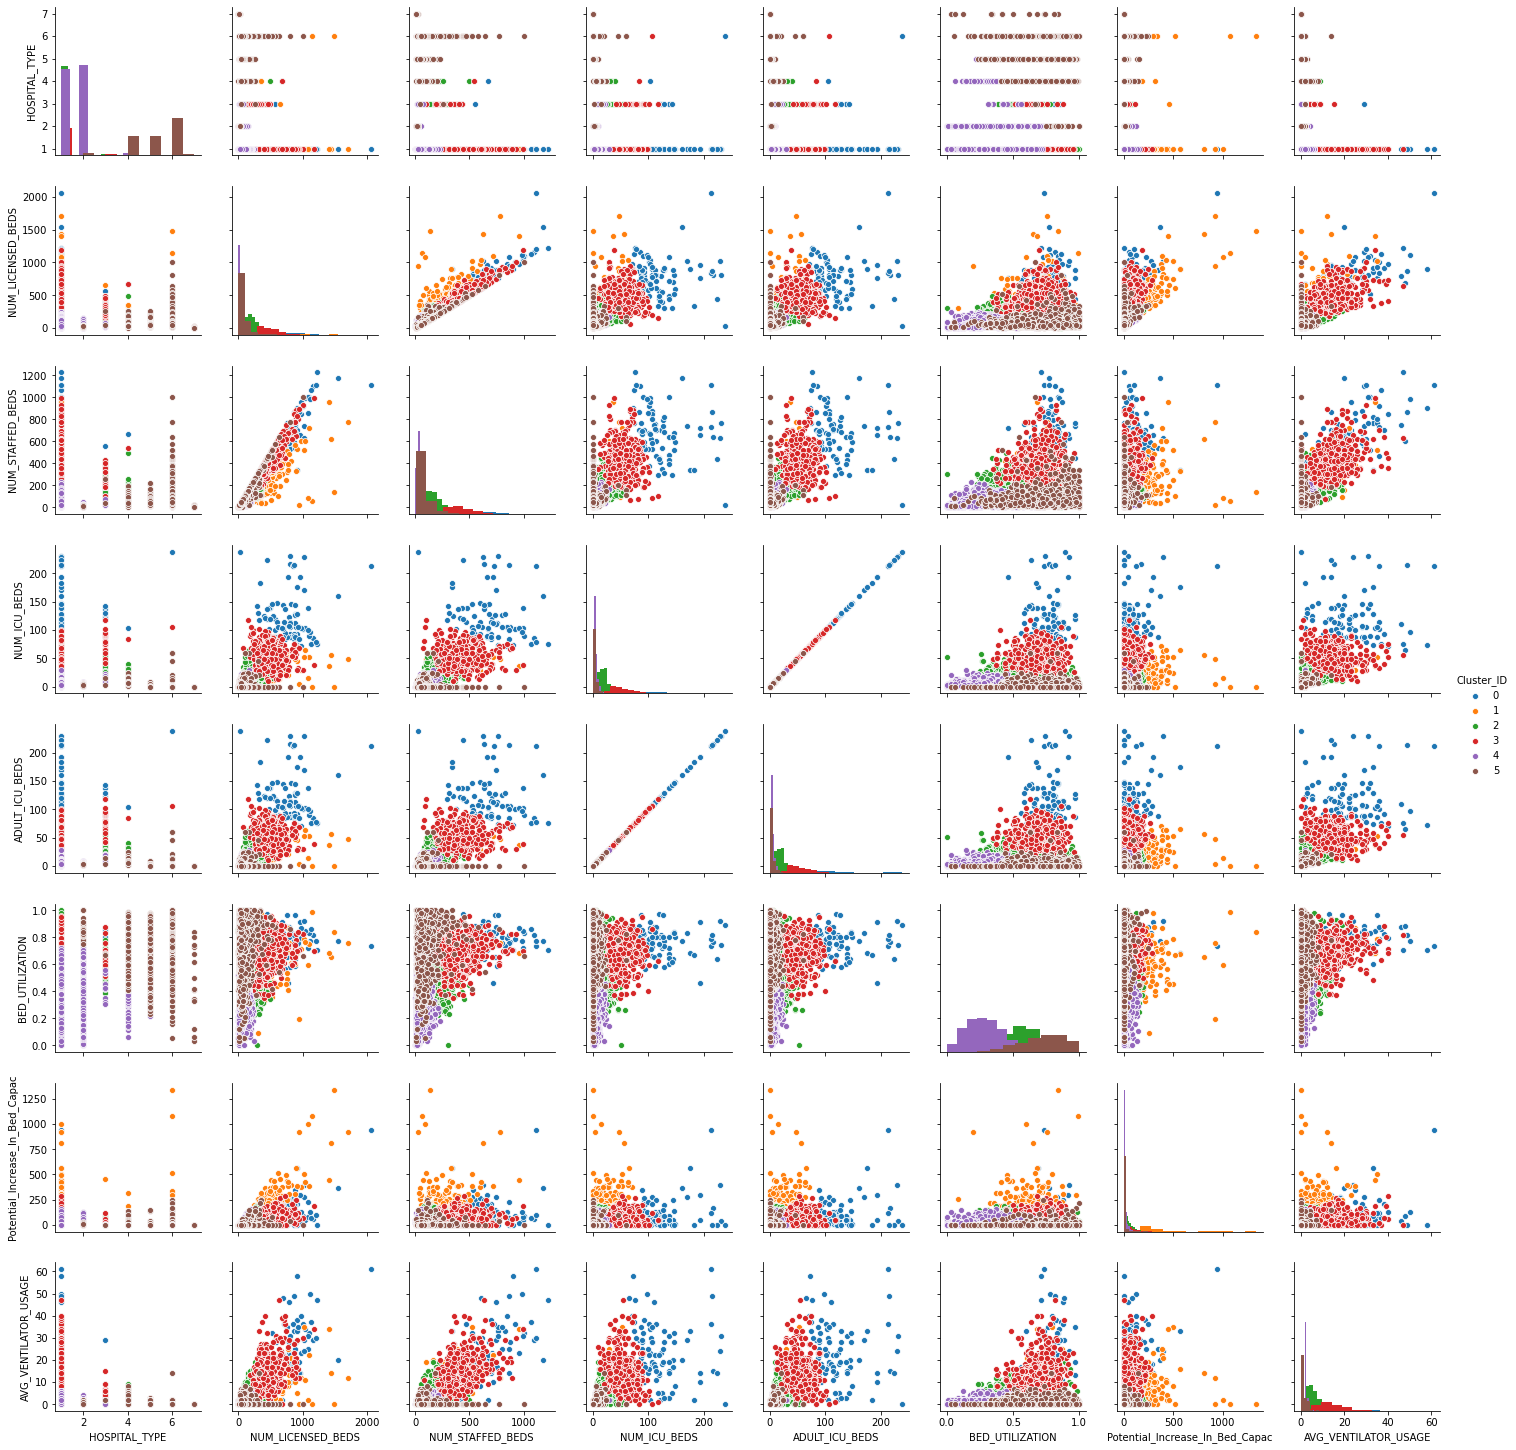

In [27]:
y=model.fit_predict(X, categorical=[1])
df_task4['Cluster_ID'] = y
# how many records are in each cluster
print("Cluster membership")
print(df_task4['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_task4, hue='Cluster_ID',diag_kind='hist')
plt.show()

Distribution for cluster 0


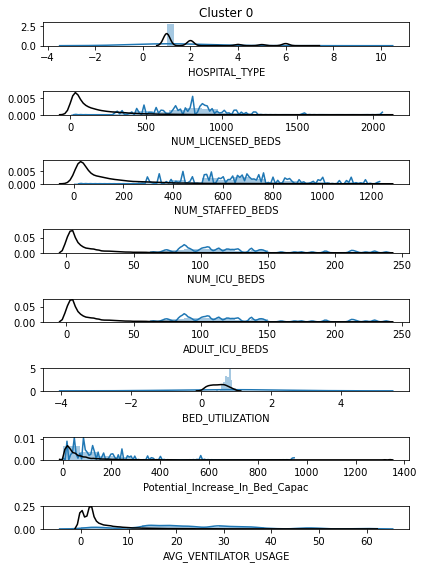

Distribution for cluster 1


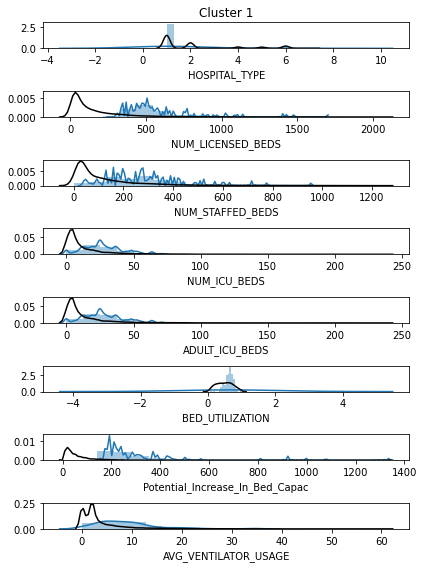

Distribution for cluster 2


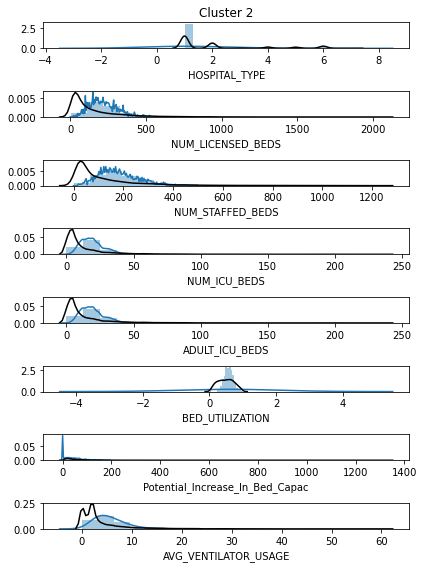

Distribution for cluster 3


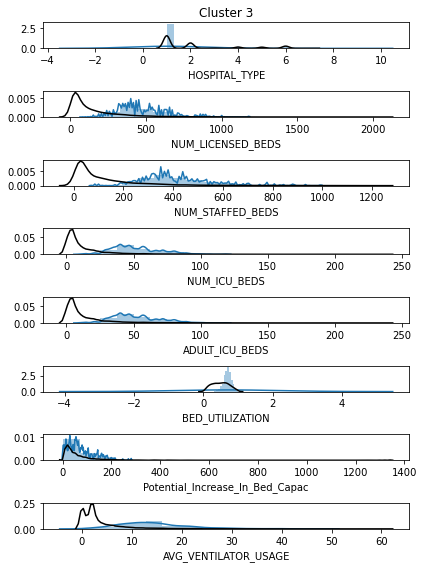

Distribution for cluster 4


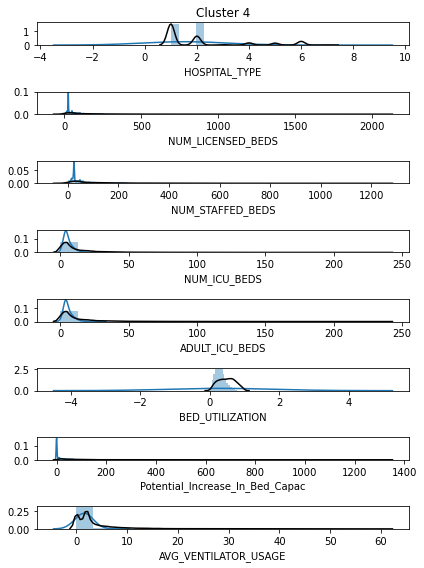

Distribution for cluster 5


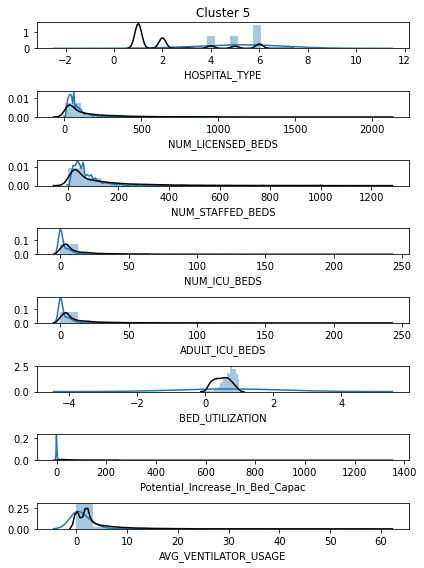

In [28]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['HOSPITAL_TYPE','NUM_LICENSED_BEDS',
 'NUM_STAFFED_BEDS',
 'NUM_ICU_BEDS',
 'ADULT_ICU_BEDS',
 'BED_UTILIZATION',
 'Potential_Increase_In_Bed_Capac',
 'AVG_VENTILATOR_USAGE']
n_bins = 20

clusters_to_inspect = [0,1,2,3,4,5]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    fig, ax = plt.subplots(nrows=8,figsize=(6,8))
    ax[0].set_title("Cluster {}".format(cluster))


    for j, col in enumerate(cols):
        bins = np.linspace(min(df_task4[col]), max(df_task4[col]), 20)
        sns.distplot(df_task4[df_task4['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
        sns.distplot(df_task4[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

# Project 2 (b): Association mining to find hotspots based on a PatentRoute Data

In [29]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [30]:
df_b = pd.read_csv('PatientRoute.csv')
# info and the first 10 transactions
print(df_b.info())
print(df_b.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  6714 non-null   int64  
 1   global_num  3571 non-null   float64
 2   date        6714 non-null   object 
 3   location    6714 non-null   object 
 4   latitude    6714 non-null   float64
 5   longitude   6714 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 314.8+ KB
None
   patient_id  global_num        date              location   latitude  \
0  1000000001         2.0  22/01/2020  Gyeonggi-do_Gimpo-si  37.615246   
1  1000000001         2.0  24/01/2020         Seoul_Jung-gu  37.567241   
2  1000000002         5.0  25/01/2020     Seoul_Seongbuk-gu  37.592560   
3  1000000002         5.0  26/01/2020     Seoul_Seongbuk-gu  37.591810   
4  1000000002         5.0  26/01/2020    Seoul_Seongdong-gu  37.563992   
5  1000000002         5.0  26/01/2020     Seoul_Seong

## Project 2b task1

What variables did you include in the analysis? Justify your choice.

Answer:
   - The variables patient_id and location are included in the analysis. This is because each patient_id can be referred as a transaction and the location variable which contains the places positive patients visited will allow us to find the common routes of those patients.

In [31]:
df_b_task1 = df_b.drop(['global_num','latitude','longitude','date'], axis = 1)
df_b_task1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  6714 non-null   int64 
 1   location    6714 non-null   object
dtypes: int64(1), object(1)
memory usage: 105.0+ KB


In [32]:
transactions = df_b_task1.groupby(['patient_id'])['location'].apply(list)
print(transactions.head(5))

patient_id
1000000001                [Gyeonggi-do_Gimpo-si, Seoul_Jung-gu]
1000000002    [Seoul_Seongbuk-gu, Seoul_Seongbuk-gu, Seoul_S...
1000000003                   [Seoul_Jongno-gu, Seoul_Jongno-gu]
1000000004                                  [Seoul_Jungnang-gu]
1000000005                                  [Seoul_Jungnang-gu]
Name: location, dtype: object


In [33]:
transactions

patient_id
1000000001                [Gyeonggi-do_Gimpo-si, Seoul_Jung-gu]
1000000002    [Seoul_Seongbuk-gu, Seoul_Seongbuk-gu, Seoul_S...
1000000003                   [Seoul_Jongno-gu, Seoul_Jongno-gu]
1000000004                                  [Seoul_Jungnang-gu]
1000000005                                  [Seoul_Jungnang-gu]
                                    ...                        
6100000086    [Daegu_Dalseong-gun, Gyeongsangnam-do_Changwon...
6100000087    [Gyeongsangnam-do_Changwon-si, Gyeongsangnam-d...
6100000088    [Gyeongsangnam-do_Changwon-si, Gyeongsangnam-d...
6100000089    [Gyeongsangnam-do_Haman-gun, Gyeongsangnam-do_...
6100000090    [Incheon_Jung-gu, Seoul_Gangseo-gu, Seoul_Gang...
Name: location, Length: 1211, dtype: object

## Project 2b task2

2. Conduct association mining and answer the following:
 - a. What is the ‘min_support’ threshold set and discuss why it is chosen?
 - b. Report the top 5 frequently occurring rules and interpret them.

Answers:
- a. The min_support is set to indicate the the minimal frequency of each location appears in the transaction to be counted as associated thus there is no such a magic number. However, considering the number of unique location is 174 while there are 1211 transactions, min_support of 0.001 (0.1%) should be acceptable. Furthurmore, if the value is too less, so many rules will be acquired that it is difficult to interpret.
- b. The top 5 frequently occurring rules are listed below:
    - Chungcheongbuk-do_Jincheon-gun,Chungcheongbuk-do_Jeungpyeong-gun => Gyeonggi-do_Suwon-si,Chungcheongbuk-do_Cheongju-si	
    - Chungcheongbuk-do_Jincheon-gun,Seoul_Geumcheon-gu,Daegu_Suseong-gu => Chungcheongbuk-do_Jeungpyeong-gun,Chungcheongbuk-do_Cheongju-si	
    - Chungcheongbuk-do_Jincheon-gun,Gyeonggi-do_Suwon-si,Chungcheongbuk-do_Cheongju-si => Chungcheongbuk-do_Jeungpyeong-gun
    - Chungcheongbuk-do_Jeungpyeong-gun => Seoul_Geumcheon-gu,Chungcheongbuk-do_Cheongju-si
    - Gyeonggi-do_Suwon-si,Chungcheongbuk-do_Cheongju-si => Chungcheongbuk-do_Jeungpyeong-gun
    
    The supports value is 0.001652 which means considering all patients, 0.1652% of them have been to both the place on the left side and the place on the right side.
    The confidence for these patterns is 1.00 which means patients who have been to the place on the left side also have been to the place on the right side for 100%.
    The lift is equal to 605.5 indicating that those patients visiting Left_side are 605.5 times more likely to travel through Right_side than the patients visit randomly.   

In [34]:
from apyori import apriori
# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.001))
# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'Busan_Buk-gu'}), support=0.008257638315441783, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Busan_Buk-gu'}), confidence=0.008257638315441783, lift=1.0)]), RelationRecord(items=frozenset({'Busan_Busanjin-gu'}), support=0.017341040462427744, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Busan_Busanjin-gu'}), confidence=0.017341040462427744, lift=1.0)]), RelationRecord(items=frozenset({'Busan_Dong-gu'}), support=0.011560693641618497, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Busan_Dong-gu'}), confidence=0.011560693641618497, lift=1.0)]), RelationRecord(items=frozenset({'Busan_Dongnae-gu'}), support=0.03468208092485549, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Busan_Dongnae-gu'}), confidence=0.03468208092485549, lift=1.0)]), RelationRecord(items=frozenset({'Busan_Gangseo-gu'}), support=0.0090834021469

In [35]:
def convert_apriori_results_to_pandas_df(results):
    rules = []

    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                rule_set.support, rule.confidence, rule.lift])

    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

   Left_side                         Right_side   Support  Confidence  Lift
0                                  Busan_Buk-gu  0.008258    0.008258   1.0
1                             Busan_Busanjin-gu  0.017341    0.017341   1.0
2                                 Busan_Dong-gu  0.011561    0.011561   1.0
3                              Busan_Dongnae-gu  0.034682    0.034682   1.0
4                              Busan_Gangseo-gu  0.009083    0.009083   1.0
5                            Busan_Geumjeong-gu  0.009083    0.009083   1.0
6                              Busan_Gijang-gun  0.002477    0.002477   1.0
7                             Busan_Haeundae-gu  0.026424    0.026424   1.0
8                                 Busan_Jung-gu  0.006606    0.006606   1.0
9                                  Busan_Nam-gu  0.006606    0.006606   1.0
10                                Busan_Saha-gu  0.008258    0.008258   1.0
11                              Busan_Sasang-gu  0.004129    0.004129   1.0
12          

In [36]:
result_df

,Left_side,Right_side,Support,Confidence,Lift
0,,Busan_Buk-gu,0.008258,0.008258,1.000000
1,,Busan_Busanjin-gu,0.017341,0.017341,1.000000
2,,Busan_Dong-gu,0.011561,0.011561,1.000000
3,,Busan_Dongnae-gu,0.034682,0.034682,1.000000
4,,Busan_Gangseo-gu,0.009083,0.009083,1.000000
...,...,...,...,...,...
4031,"Daegu_Seo-gu,Daegu_Buk-gu,Seoul_Jung-gu,Daegu_...",Seoul_Dongjak-gu,0.001652,0.666667,7.762821
4032,"Daegu_Buk-gu,Seoul_Jung-gu,Seoul_Dongjak-gu,Da...",Daegu_Seo-gu,0.001652,1.000000,121.100000
4033,"Daegu_Seo-gu,Daegu_Buk-gu,Seoul_Dongjak-gu,Dae...",Daegu_Nam-gu,0.001652,1.000000,80.733333
4034,"Daegu_Nam-gu,Daegu_Seo-gu,Daegu_Buk-gu,Seoul_D...",Daegu_Jung-gu,0.001652,1.000000,16.146667


In [37]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df.head(5)

,Left_side,Right_side,Support,Confidence,Lift
2975,"Chungcheongbuk-do_Jincheon-gun,Chungcheongbuk-...","Gyeonggi-do_Suwon-si,Chungcheongbuk-do_Cheongj...",0.001652,1.0,605.5
3594,"Chungcheongbuk-do_Jincheon-gun,Seoul_Geumcheon...","Chungcheongbuk-do_Cheongju-si,Chungcheongbuk-d...",0.001652,1.0,605.5
2980,"Chungcheongbuk-do_Jincheon-gun,Gyeonggi-do_Suw...",Chungcheongbuk-do_Jeungpyeong-gun,0.001652,1.0,605.5
1866,Chungcheongbuk-do_Jeungpyeong-gun,"Chungcheongbuk-do_Cheongju-si,Seoul_Geumcheon-gu",0.001652,1.0,605.5
1862,"Gyeonggi-do_Suwon-si,Chungcheongbuk-do_Cheongj...",Chungcheongbuk-do_Jeungpyeong-gun,0.001652,1.0,605.5


In [39]:
result_df.head(5).style.set_properties(subset=['Left_side'], **{'width-min': '300px'})

,Left_side,Right_side,Support,Confidence,Lift
2975,"Chungcheongbuk-do_Jincheon-gun,Chungcheongbuk-do_Jeungpyeong-gun","Gyeonggi-do_Suwon-si,Chungcheongbuk-do_Cheongju-si",0.001652,1.000000,605.500000
3594,"Chungcheongbuk-do_Jincheon-gun,Seoul_Geumcheon-gu,Daegu_Suseong-gu","Chungcheongbuk-do_Cheongju-si,Chungcheongbuk-do_Jeungpyeong-gun",0.001652,1.000000,605.500000
2980,"Chungcheongbuk-do_Jincheon-gun,Gyeonggi-do_Suwon-si,Chungcheongbuk-do_Cheongju-si",Chungcheongbuk-do_Jeungpyeong-gun,0.001652,1.000000,605.500000
1866,Chungcheongbuk-do_Jeungpyeong-gun,"Chungcheongbuk-do_Cheongju-si,Seoul_Geumcheon-gu",0.001652,1.000000,605.500000
1862,"Gyeonggi-do_Suwon-si,Chungcheongbuk-do_Cheongju-si",Chungcheongbuk-do_Jeungpyeong-gun,0.001652,1.000000,605.500000


## Project 2b task3

Identify at least 10 common routes that positive patients from ‘Daegu_Buk-gu’ have travelled.

Answer:
- Seoul_Jung-gu,Daegu_Seo-gu =>	Daegu_Jung-gu,Seoul_Dongjak-gu,Daegu_Buk-gu,Daegu_Nam-gu	
- Daegu_Jung-gu,Seoul_Jung-gu,Seoul_Dongjak-gu,Daegu_Nam-gu => Daegu_Seo-gu,Daegu_Buk-gu	
- Daegu_Jung-gu,Seoul_Jung-gu,Daegu_Seo-gu => Seoul_Dongjak-gu,Daegu_Buk-gu,Daegu_Nam-gu		
- Seoul_Dongjak-gu,Daegu_Seo-gu => Daegu_Jung-gu,Seoul_Jung-gu,Daegu_Buk-gu,Daegu_Nam-gu		
- Seoul_Dongjak-gu,Daegu_Seo-gu,Daegu_Nam-gu => Daegu_Jung-gu,Seoul_Jung-gu,Daegu_Buk-gu		
- Daegu_Jung-gu,Seoul_Jung-gu,Daegu_Seo-gu,Daegu_Nam-gu => Seoul_Dongjak-gu,Daegu_Buk-gu		
- Daegu_Jung-gu,Seoul_Dongjak-gu,Daegu_Seo-gu,Daegu_Nam-gu => Seoul_Jung-gu,Daegu_Buk-gu	
- Daegu_Jung-gu,Seoul_Jung-gu,Daegu_Nam-gu => Seoul_Dongjak-gu,Daegu_Buk-gu
- Seoul_Jung-gu,Daegu_Nam-gu => Daegu_Jung-gu,Daegu_Seo-gu,Seoul_Dongjak-gu,Daegu_Buk-gu		
- Daegu_Jung-gu,Seoul_Dongjak-gu,Daegu_Nam-gu => Seoul_Jung-gu,Daegu_Buk-gu	

In [40]:
#select all transactions (patients) that travelled via Daegu_Buk-gu (either Left_side or Right_side contain "Daegu_Buk-gu").
result_daegu = result_df[(result_df['Left_side'].str.contains("Daegu_Buk-gu")) | (result_df['Right_side'].str.contains("Daegu_Buk-gu"))]

In [41]:
result_daegu.head(10).style.set_properties(subset=['Left_side'], **{'width-min': '300px'})

,Left_side,Right_side,Support,Confidence,Lift
3993,"Daegu_Seo-gu,Seoul_Jung-gu","Daegu_Nam-gu,Seoul_Dongjak-gu,Daegu_Buk-gu,Daegu_Jung-gu",0.001652,0.666667,403.666667
4027,"Daegu_Nam-gu,Seoul_Dongjak-gu,Seoul_Jung-gu,Daegu_Jung-gu","Daegu_Seo-gu,Daegu_Buk-gu",0.001652,1.000000,403.666667
4009,"Daegu_Seo-gu,Seoul_Jung-gu,Daegu_Jung-gu","Seoul_Dongjak-gu,Daegu_Buk-gu,Daegu_Nam-gu",0.001652,0.666667,403.666667
3992,"Daegu_Seo-gu,Seoul_Dongjak-gu","Daegu_Jung-gu,Daegu_Nam-gu,Daegu_Buk-gu,Seoul_Jung-gu",0.001652,1.000000,403.666667
4011,"Daegu_Seo-gu,Seoul_Dongjak-gu,Daegu_Nam-gu","Daegu_Jung-gu,Daegu_Buk-gu,Seoul_Jung-gu",0.001652,1.000000,403.666667
4026,"Daegu_Seo-gu,Daegu_Nam-gu,Seoul_Jung-gu,Daegu_Jung-gu","Seoul_Dongjak-gu,Daegu_Buk-gu",0.001652,0.666667,403.666667
4025,"Daegu_Seo-gu,Daegu_Nam-gu,Seoul_Dongjak-gu,Daegu_Jung-gu","Daegu_Buk-gu,Seoul_Jung-gu",0.001652,1.000000,403.666667
3809,"Daegu_Nam-gu,Seoul_Jung-gu,Daegu_Jung-gu","Seoul_Dongjak-gu,Daegu_Buk-gu",0.001652,0.666667,403.666667
3991,"Seoul_Jung-gu,Daegu_Nam-gu","Daegu_Seo-gu,Seoul_Dongjak-gu,Daegu_Buk-gu,Daegu_Jung-gu",0.001652,0.666667,403.666667
3808,"Daegu_Nam-gu,Seoul_Dongjak-gu,Daegu_Jung-gu","Daegu_Buk-gu,Seoul_Jung-gu",0.001652,1.000000,403.666667


## Project 2b task4

Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalize why?

Answer:
   - Yes, the sequence analysis can be performed because the data set contains date as a result it can be used to sort the order of the locations. According to the strongest rule, the support value indicates that almost 3% of patients travelled from Incheon_Jung-gu to Seoul_Gangnam-gu. The confidence value suggests that when a patient travel to Incheon_Jung-gu, there is a probability of 24% of that patient will travel to Seoul_Gangnam-gu.

In [42]:
df_b_task4 = df_b.sort_values(by='date', ascending=True)

In [43]:
df_b_task4.head()

,patient_id,global_num,date,location,latitude,longitude
28,1000000009,19.0,1/02/2020,Incheon_Yeonsu-gu,37.381479,126.657175
27,1000000009,19.0,1/02/2020,Incheon_Yeonsu-gu,37.381479,126.657175
26,1000000009,19.0,1/02/2020,Seoul_Songpa-gu,37.498450,127.107250
93,1000000021,136.0,1/02/2020,Seoul_Jongno-gu,37.576678,127.005993
4499,3009000014,NaN,1/03/2020,Gangwon-do_Wonju-si,37.349801,127.932105


In [44]:
df_b_task4 = df_b.drop(['global_num','latitude','longitude','date'], axis = 1)
df_b_task4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  6714 non-null   int64 
 1   location    6714 non-null   object
dtypes: int64(1), object(1)
memory usage: 105.0+ KB


In [45]:
transactions = df_b_task4.groupby(['patient_id'])['location'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences[:5])

[['Gyeonggi-do_Gimpo-si', 'Seoul_Jung-gu'], ['Seoul_Seongbuk-gu', 'Seoul_Seongbuk-gu', 'Seoul_Seongdong-gu', 'Seoul_Seongbuk-gu', 'Seoul_Seongbuk-gu', 'Seoul_Seongbuk-gu', 'Seoul_Dongdaemun-gu', 'Seoul_Seongbuk-gu', 'Seoul_Jungnang-gu', 'Seoul_Jungnang-gu', 'Seoul_Gangnam-gu', 'Seoul_Jungnang-gu', 'Seoul_Jungnang-gu'], ['Seoul_Jongno-gu', 'Seoul_Jongno-gu'], ['Seoul_Jungnang-gu'], ['Seoul_Jungnang-gu']]


In [46]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', supp_param, conf_param], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [48]:
result_task4b = get_association_rules(sequences, 0.001, 0.1)

In [49]:
result_task4b.sort_values(by=['Support', 'Confidence'], ascending=False)

,Left_rule,Right_rule,Support,Confidence
149,[Incheon_Jung-gu],[Seoul_Gangnam-gu],0.029727,0.240000
180,[Incheon_Jung-gu],[Seoul_Songpa-gu],0.020644,0.166667
139,[Incheon_Jung-gu],[Seoul_Jungnang-gu],0.017341,0.140000
813,[Chungcheongnam-do_Asan-si],[Chungcheongnam-do_Cheonan-si],0.016515,0.714286
135,[Seoul_Songpa-gu],[Seoul_Jungnang-gu],0.015690,0.345455
...,...,...,...,...
118,[Seoul_Seongdong-gu],[Busan_Yeonje-gu],0.001652,0.100000
120,[Seoul_Seongdong-gu],"[Busan_Yeonje-gu, Busan_Busanjin-gu]",0.001652,0.100000
121,[Seoul_Seongdong-gu],[Busan_Busanjin-gu],0.001652,0.100000
122,[Seoul_Seongdong-gu],[Busan_Seo-gu],0.001652,0.100000


## Project 2b task5

How the outcome of this study can be used by the decision-makers?

Answer:
- The result from this study can be used to implement active search strategy in South Korea as not only the main outbreak spot of each cluster can be indentified but it also allows the decision-makers to determine the probability of patients to be diagnosed with COVID-19 based on their record of travelling history.